# YOLO v5 (VEGA)

---
## Importovanie modulov:

In [2]:
import torch
from IPython.display import Image, display, clear_output
import os 
import random
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

---
## Trenovanie - spustenie trénovania modelu:

In [ ]:
!python yolo_v5/train.py --img 1024 --batch 1 --epochs 3000 --data datasets/vega/document/vega_yolo.yaml --weights yolov5s.pt

---
## Inferencia - vytvorenie modelu:

In [23]:
!python yolo_v5/detect.py --source datasets/vega/document/test --weights yolo_v5/runs/train/exp3/weights/best.pt --conf 0.25 --name vega_road_det --hide-conf --hide-label

detect: weights=['yolo_v5/runs/train/exp3/weights/best.pt'], source=datasets/vega/document/test, data=yolo_v5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolo_v5/runs/detect, name=vega_road_det, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 2022-4-27 torch 1.11.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11175MiB)

Fusing layers... 
Model summary: 213 layers, 7037095 parameters, 0 gradients, 15.9 GFLOPs
image 1/3 /home/filipmikus/bp/yolo/datasets/vega/document/test/IMG_1512.jpg: 640x416 3 1s, 34 9s, Done. (0.006s)
image 2/3 /home/filipmikus/bp/yolo/datasets/vega/document/test/IMG_1517.jpg: 640x416 1 1, 7 9s, Done. (0.005s)
image 3/3 /home/filipmikus/bp/yolo/datasets/vega/document/test/IMG_1522.jpg: 640x416 3 9s, Done. (0

In [ ]:
model = torch.hub.load('yolo_v5','custom', path='yolo_v5/runs/train/exp3/weights/best.pt', force_reload=True, source='local')

---
## Inferencia - detekcia:

### Detekcia na VEGA vzorkách:

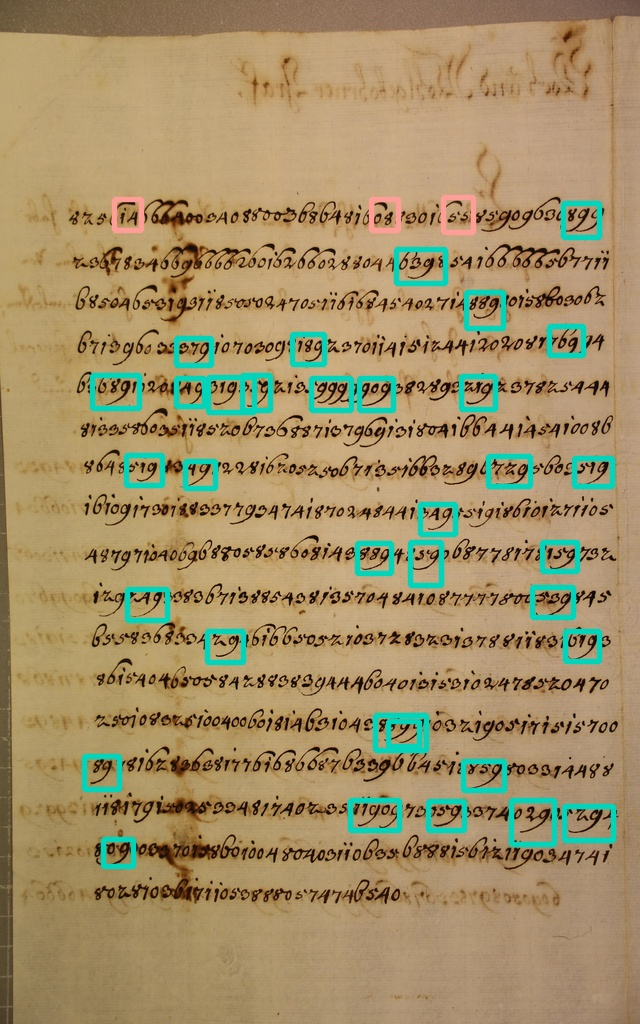

In [24]:
img = "yolo_v5/runs/detect/vega_road_det7/IMG_1512.jpg"
display(Image(img))

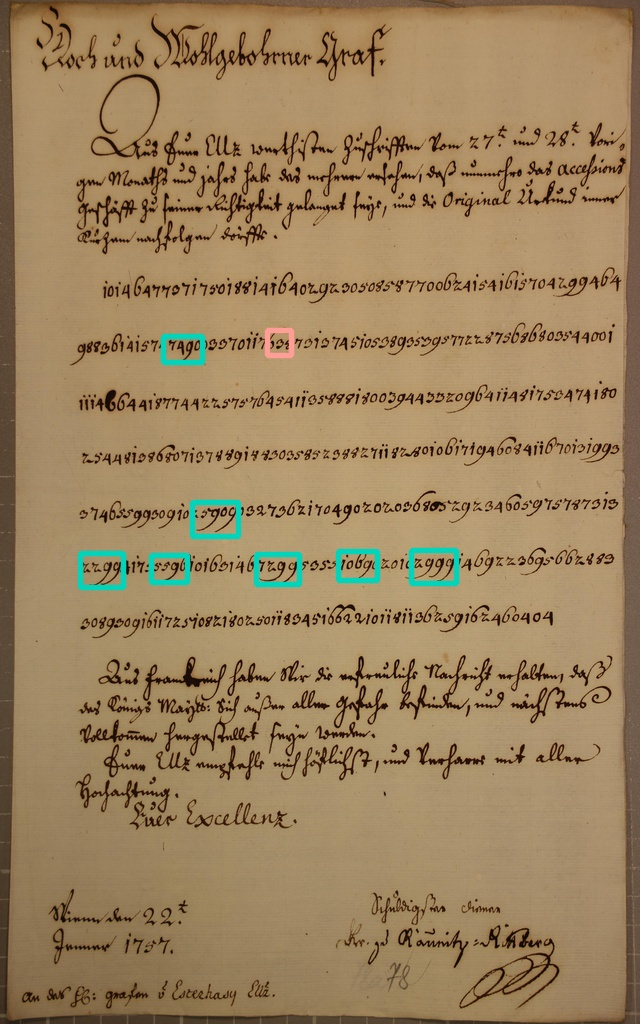

In [25]:
img = "yolo_v5/runs/detect/vega_road_det7/IMG_1517.jpg"
display(Image(img))

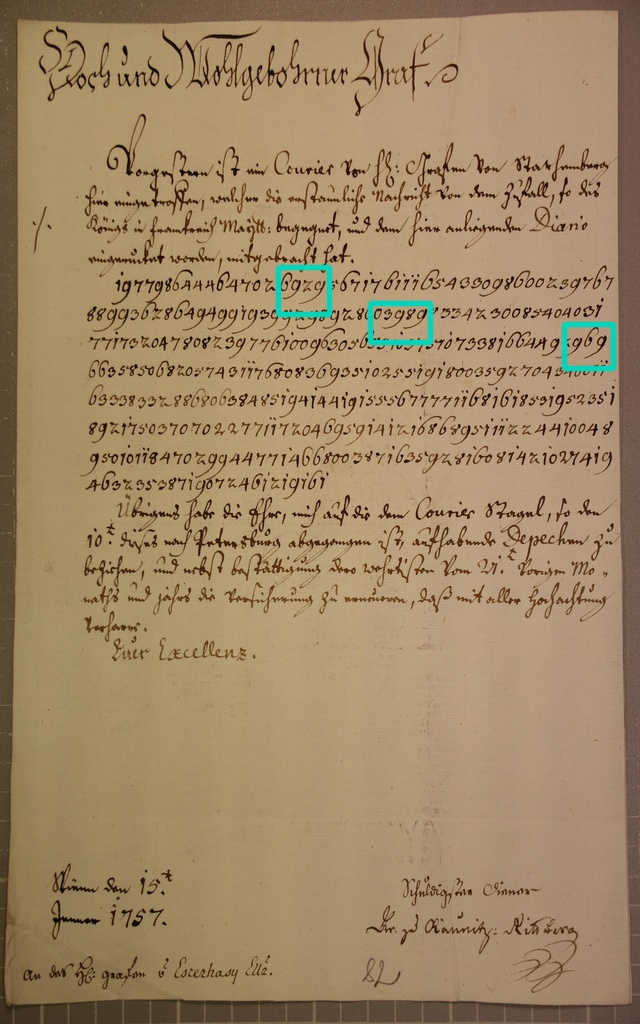

In [26]:
img = "yolo_v5/runs/detect/vega_road_det7/IMG_1522.jpg"
display(Image(img))

### Detekcia na VEGA-cropped vzorkách:

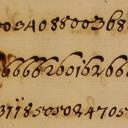

In [12]:
img = "yolo_v5/runs/detect/vega_road_det6/IMG_1512_col192_row192.jpg"
display(Image(img))

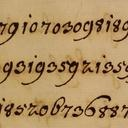

In [13]:
img = "yolo_v5/runs/detect/vega_road_det6/IMG_1512_col192_row320.jpg"
display(Image(img))

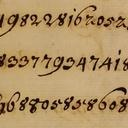

In [14]:
img = "yolo_v5/runs/detect/vega_road_det6/IMG_1512_col192_row448.jpg"
display(Image(img))

---
## Inferencia - klasifikácia:

### Klasifikácia na VEGA vzorke:

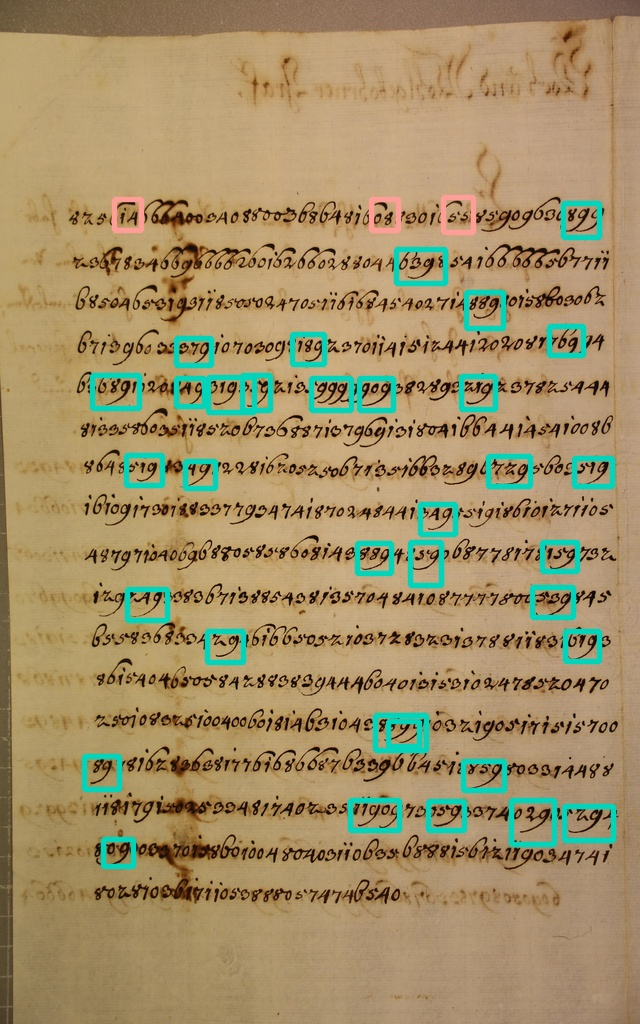

          xmin        ymin        xmax        ymax  confidence  class name
0   462.728973  760.699707  504.228851  789.535278    0.475951      9    9
1   184.858704  461.499664  215.133835  487.603271    0.452205      9    9
2   374.674896  714.823425  425.541718  750.196716    0.439431      9    9
3    83.990295  755.719971  119.267471  788.939026    0.438430      9    9
4   387.939087  721.153503  419.145599  745.530701    0.433256      9    9
5   207.069366  630.965759  242.597046  662.417664    0.417507      9    9
6   563.524902  805.755005  613.272156  840.132141    0.417149      9    9
7   460.682709  375.902252  494.758392  408.755707    0.415109      9    9
8   126.480667  455.024384  161.871750  485.409637    0.412902      9    9
9   358.506165  377.966614  392.893555  410.180511    0.398151      9    9
10  102.953911  838.693481  133.195175  866.043640    0.378995      9    9
11  396.392334  249.053375  444.831512  282.529022    0.372995      9    9
12  573.917114  457.94433

In [27]:
display(Image("yolo_v5/runs/detect/vega_road_det7/IMG_1512.jpg"))
results = model("datasets/vega/document/test/IMG_1512.jpg")
pd_results = results.pandas().xyxy[0]
print(pd_results.to_string())

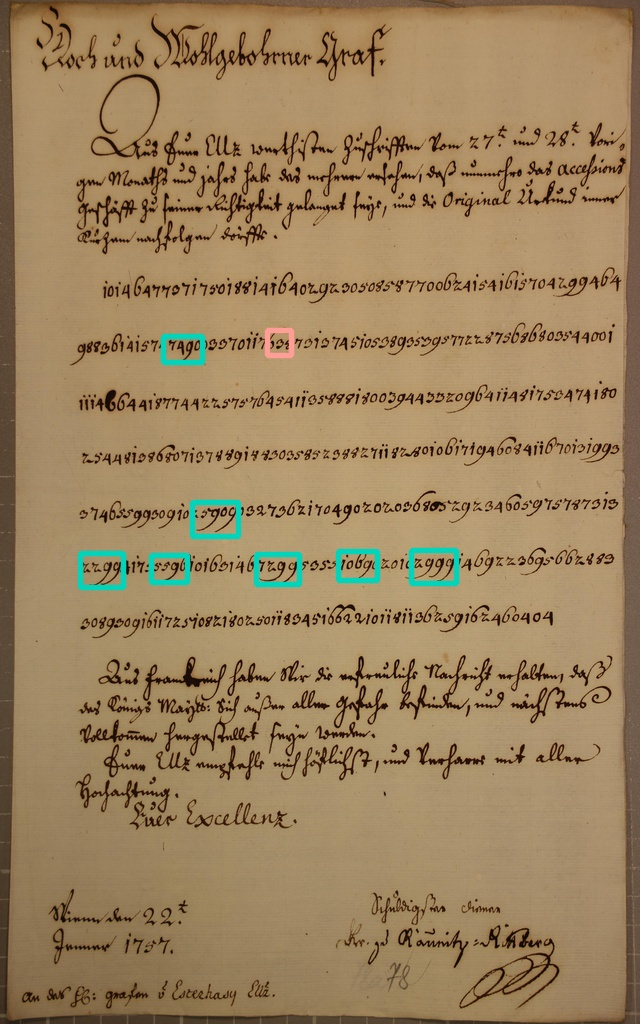

         xmin        ymin        xmax        ymax  confidence  class name
0  192.421829  501.532074  237.746002  535.771423    0.378511      9    9
1  338.344574  551.170654  377.412354  580.041687    0.363440      9    9
2  256.375580  553.634216  298.980103  584.451965    0.341245      9    9
3   80.477989  553.403564  123.272499  586.815491    0.316304      9    9
4  162.659866  336.206299  202.156982  362.478424    0.314751      9    9
5  410.806946  549.879028  455.662598  582.754700    0.303849      9    9
6  151.047592  555.212341  187.064758  581.607727    0.286876      9    9
7  267.115326  330.490997  290.897949  355.469513    0.252831      1    1


In [28]:
display(Image("yolo_v5/runs/detect/vega_road_det7/IMG_1517.jpg"))
results = model("datasets/vega/document/test/IMG_1517.jpg")
pd_results = results.pandas().xyxy[0]
print(pd_results.to_string())

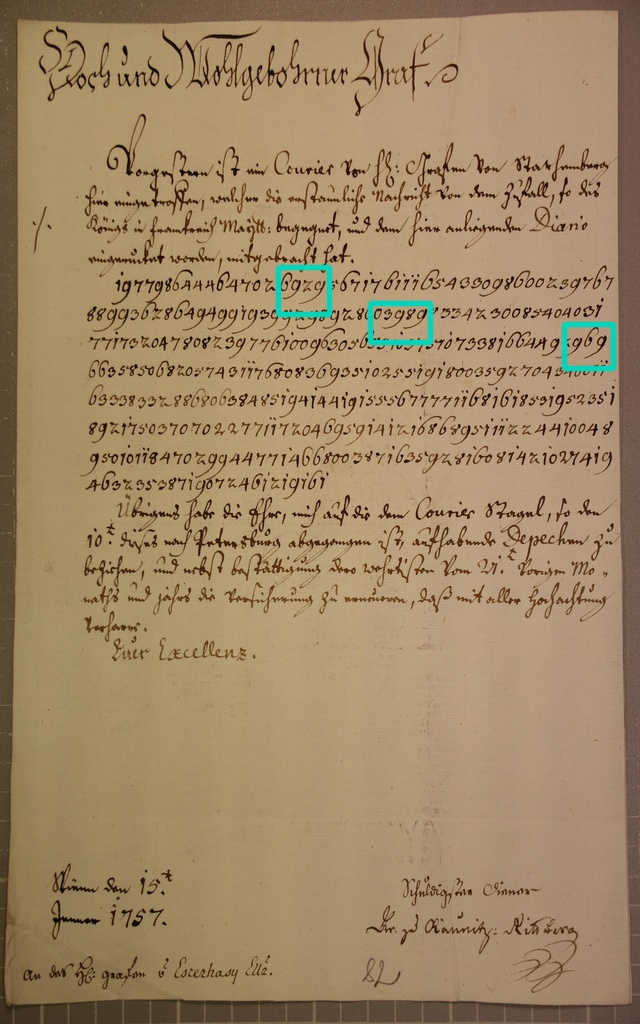

         xmin        ymin        xmax        ymax  confidence  class name
0  369.632416  303.449585  429.510712  342.351929    0.349870      9    9
1  277.548981  267.326843  329.007172  314.475464    0.288767      9    9
2  564.120300  323.738953  613.086670  367.720642    0.275248      9    9


In [29]:
display(Image("yolo_v5/runs/detect/vega_road_det7/IMG_1522.jpg"))
results = model("datasets/vega/document/test/IMG_1522.jpg")
pd_results = results.pandas().xyxy[0]
print(pd_results.to_string())